<a href="https://colab.research.google.com/github/G-Shino/colab_tutorial/blob/master/MNIST_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPUを使用できているかの確認
- /device:GPU:0となればよい
- 違う場合、`編集`->`ノートブックの設定`を開き、ハードウェアアクセラレーターでGPUを選択する

In [0]:
from tensorflow.test import gpu_device_name
gpu_device_name()

'/device:GPU:0'

#Google Driveにアクセス
- drive/My Drive内にファイルが存在


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# colabでtensorboardを使用するための下準備

## ngrokのダウンロード
  - ngrok:  ローカルPC上で稼働しているネットワーク（TCP）サービスを外部公開できるサービス
  - wget: 指定したURLのファイルをダウンロードするためのコマンド
  - /usr/binに移動させることで、```ngrok```のみでアクセスできる。成功するとバージョンが表示される。

In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
!sudo cp ngrok /usr/bin/
!rm ngrok*
!ngrok version

--2019-05-11 04:40:57--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.206.9.96, 3.92.108.98, 52.54.84.112, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.206.9.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16529980 (16M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  15.76M  15.6MB/s    in 1.0s    

2019-05-11 04:40:59 (15.6 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [16529980/16529980]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
cp: cannot create regular file '/usr/bin/ngrok': Text file busy
ngrok version 2.3.28


# 全結合層モデルによる手書きデータの学習
- sequentional と functional APIの2つの書き方


## データの取り込みと加工(見本表示用)
- 28 * 28ピクセルを784の次数に
- typeをfloatに、0~1までに正規化
- one-hotベクトルに(一つが1で他が0となる)
- モデルコード単体でも動かしたいので、モデルのコート内にも同じものが書いてある

In [0]:
%matplotlib inline
import pandas as pd
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = mnist.load_data()

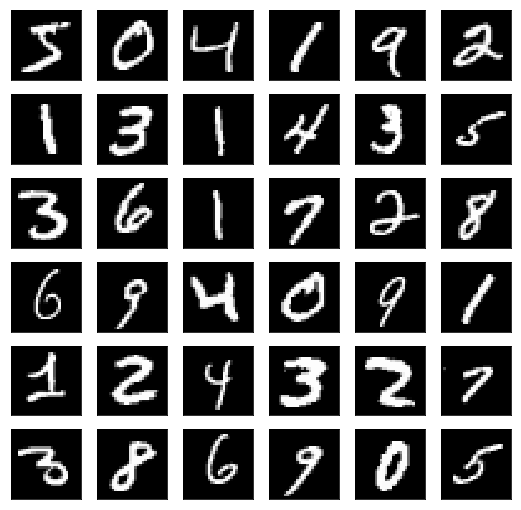

In [0]:
fig = plt.figure(figsize=(9,9))
for i in range(36):
  ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
  ax.imshow(x_train[i], cmap="gist_gray")

In [0]:
x_train = x_train.reshape(60000, 784).astype("float32")/255
x_test = x_test.reshape(10000, 784).astype("float32")/255

#ont-hot
y_train = keras.utils.np_utils.to_categorical(y_train.astype("int32"), 10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype("int32"), 10)

print(x_train.shape, y_train.shape)

(60000, 784) (60000, 10, 10, 10)


## modelの作成(sequential model)
- inputが784個
- 512個の全結合層が2つ
- outputが10個のモデル
- verbose0は標準出力なし　1はログをプログレスバーに出力
- Dropoutは過学習の防止のため。ランダムにユニットを0にする(抜き取るイメージ)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.2478 - acc: 0.9239 - val_loss: 0.1224 - val_acc: 0.9600
Epoch 2/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.1022 - acc: 0.9688 - val_loss: 0.0894 - val_acc: 0.9725
Epoch 3/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0747 - acc: 0.9771 - val_loss: 0.0880 - val_acc: 0.9752
Epoch 4/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0598 - acc: 0.9817 - val_loss: 0.0802 - val_acc: 0.9790
Epoch 5/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0492 - acc: 0.9855 - val_loss: 0.0811 - val_acc: 0.9792
Epoch 6/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0440 - acc: 0.9873 - val_loss: 0.0758 - val_acc: 0.9808
Epoch 7/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0398 - acc: 0.9884 - val_loss: 0.0787 - val_acc

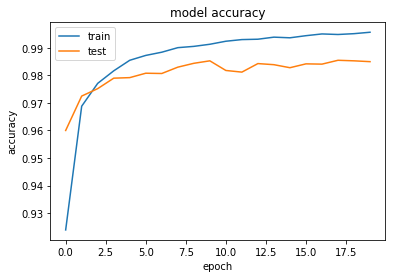

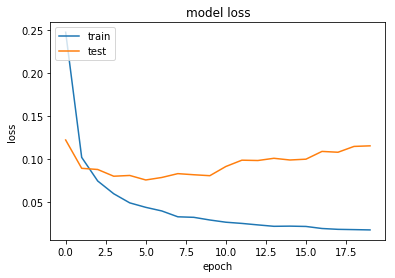

In [0]:
%matplotlib inline
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype("float32")/255
x_test = x_test.reshape(10000, 784).astype("float32")/255

#ont-hot
y_train = keras.utils.np_utils.to_categorical(y_train.astype("int32"), 10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype("int32"), 10)


model = Sequential()

model.add(Dense(512, activation="relu", input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

#def for training
model.compile(loss="categorical_crossentropy",
             optimizer=RMSprop(),
             metrics=["accuracy"])

#excute train for 20 epochs   verbose0は標準出力なし　1はログをプログレスバーに出力
history = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

## modelの作成(Functional API)
- 複雑なモデル(途中でデータを抜くとか)を書くときは、こっちの方が良いらしい。

In [0]:
%matplotlib inline
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.engine import Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import RMSprop

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype("float32")/255
x_test = x_test.reshape(10000, 784).astype("float32")/255

#ont-hot
y_train = keras.utils.np_utils.to_categorical(y_train.astype("int32"), 10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype("int32"), 10)

inputs = Input(shape=(784,))

nw = Dense(512, activation="relu")(inputs)
nw = Dropout(0.2)(nw)
nw = Dense(512, activation="relu")(nw)
nw = Dropout(0.2)(nw)
predictions = Dense(10, activation="softmax")(nw)

model = Model(inputs=inputs, outputs=predictions)
model.compile(loss="categorical_crossentropy", 
              optimizer=RMSprop(), 
              metrics=["accuracy"])

history = model.fit(x_train, y_train, 
                    batch_size=128, 
                    epochs=20, 
                    verbose=1, 
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.2459 - acc: 0.9239 - val_loss: 0.1524 - val_acc: 0.9513
Epoch 2/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.1033 - acc: 0.9694 - val_loss: 0.0774 - val_acc: 0.9757
Epoch 3/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0758 - acc: 0.9776 - val_loss: 0.0841 - val_acc: 0.9728
Epoch 4/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0604 - acc: 0.9827 - val_loss: 0.0815 - val_acc: 0.9789
Epoch 5/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0526 - acc: 0.9842 - val_loss: 0.0855 - val_acc: 0.9797
Epoch 6/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0459 - acc: 0.9864 - val_loss: 0.0771 - val_acc: 0.9813
Epoch 7/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0400 - acc: 0.9884 - val_loss: 0.0845 - val_acc

# CNNによる手書きデータの学習

## modelの作成(sequential model)
- kerasのバックエンドとして使われるライブラリには、TensorFlowとTheanoがある。入力チャネルの順番が異なるので場合分けする必要がある。

  e.g.) Using TensorFlow backend
- ↑channels_first or channels_last の二種類
- 畳み込み層(1):フィルターサイズ3 * 3が32枚
- 畳み込み層(2):フィルターサイズ3 * 3が64枚
- pooling層(1): サイズ2 * 2
- 全結合層128
- outputs 10個
- logは./logsに保存
- backend.clear_sessin() でlayerのnameを初期化

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import backend as K
import os

batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == "channels_first":
  x_train = x_train.reshape(x_train.shape[0], 1,img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape=(1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape=(img_rows, img_cols, 1)
  
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

y_train = keras.utils.np_utils.to_categorical(y_train.astype("int32"), num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test.astype("int32"), num_classes)

K.clear_session()
model = Sequential()
model.add(Conv2D(32,kernel_size=(3, 3),
                activation="relu",
                input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3),
                activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss="categorical_crossentropy",
             optimizer=Adam(),
             metrics=["accuracy"])

log_dir = "./logs"
os.makedirs(log_dir, exist_ok=True)
callback = TensorBoard(log_dir=LOG_DIR, 
                       histogram_freq=0)

drive_dir = "./drive/My Drive/models"
os.makedirs(drive_dir, exist_ok=True)
checkpointer = ModelCheckpoint(filepath = drive_dir + '/models_{epoch:02d}-{val_loss:.2f}.hdf5', 
                               verbose=1, 
                               save_best_only=True)

model.summary()
history=model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(x_test, y_test),
                 callbacks=[callback, checkpointer])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

## tensorboardに接続するためのurlの取得

- プロセスの確認
- tensorboardの出力を初期化したいときは、プロセスをkillする必要がある
- また、logsディレクトリ内を確認する必要もある

In [0]:
!ps aux | grep ngr
!ps aux | grep tensorboard

root        2528  0.2  0.2 245244 37872 ?        Sl   06:00   0:01 ngrok http 6006
root        2808  0.0  0.0  39196  6432 ?        S    06:09   0:00 /bin/bash -c ps aux | grep ngr
root        2810  0.0  0.0  38568  4996 ?        S    06:09   0:00 grep ngr
root        2525  0.4  2.2 1669336 304476 ?      Sl   06:00   0:02 /usr/bin/python2 /usr/local/bin/tensorboard --logdir ./logs --host 0.0.0.0 --port 6006
root        2811  0.0  0.0  39196  6436 ?        S    06:09   0:00 /bin/bash -c ps aux | grep tensorboard
root        2813  0.0  0.0  38568  5612 ?        S    06:09   0:00 grep tensorboard


In [0]:
!kill 2528 2525

- tensorboardのhostとportの設定
- 6006番ポートを外部に公開する
- get_ipython()でIpython commandsにアクセスする。.system_rawでcommandをnative terminalで実行する。
- おそらく、バックで二つのコマンドが動き続けている。!だとバックグラウンドで動作し続けることができない
- 0.0.0.0はワイルドカードみたいなもの。任意のiPv4アドレス
- tensorboardをリセットするにはprocessをkillしてから、この手順を再度行う必要がある

In [0]:
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(log_dir)
)
get_ipython().system_raw('ngrok http 6006 &')

- ```curl http://localhost:4040```でngrokの設定にアクセスできる
- localhost:4040はngrokのWeb Interface というアプリケーションになっている。
- curl -s は進捗を表示しないという意味
- -Sをつけると、エラーは表示

In [0]:
! curl  -sS http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://a31ec9d8.ngrok.io


## modelの作成(Function API)

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import backend as K
import os

batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == "channels_first":
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape=(1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape=(img_rows, img_cols, 1)
  
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

y_train = keras.utils.np_utils.to_categorical(y_train.astype("int32"), num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test.astype("int32"), num_classes)

K.clear_session()
inputs = Input(shape=input_shape)
nw = Conv2D(32, kernel_size=(3, 3), activation="relu")(inputs)
nw = Conv2D(64, kernel_size=(3, 3), activation="relu")(nw)
nw = MaxPooling2D(pool_size=(2, 2))(nw)
nw = Dropout(0.25)(nw)
nw = Flatten()(nw)
nw = Dense(128, activation="relu")(nw)
nw = Dropout(0.5)(nw)
predictions = Dense(num_classes, activation="softmax")(nw)

model = Model(inputs=inputs, outputs=predictions)

model.compile(loss="categorical_crossentropy",
             optimizer=Adam(),
             metrics=["accuracy"])


model.summary()
history=model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(x_test, y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
__________